In [45]:
%pip install --upgrade pip

In [46]:
pip install geopandas

Note: you may need to restart the kernel to use updated packages.


In [93]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Read the shapefile
police_district_df = gpd.read_file("boston-massachusetts-police-districts.shp")

# Print the first few rows of the GeoDataFrame
print(police_district_df)

    DISTRICT_1 DISTRICT DISTRICT_2        STArea BPDGIS_GIS   ID  \
0          1.0       A1         01  4.445582e+07          A   A1   
1          6.0       C6         06  1.237108e+08          C   C6   
2          4.0       D4         04  7.000553e+07          D   D4   
3         14.0      D14         14  1.236253e+08          D  D14   
4         13.0      E13         13  1.119417e+08          E  E13   
5          5.0       E5         05  1.910675e+08          E   E5   
6          3.0       B3         03  9.315668e+07          B   B3   
7         18.0      E18         18  1.632845e+08          E  E18   
8          2.0       B2         02  1.196784e+08          B   B2   
9         15.0      A15         15  3.798284e+07          A  A15   
10         7.0       A7         07  1.401151e+08          A   A7   
11        11.0      C11         11  1.329178e+08          C  C11   

         STLength                                           geometry  
0    49080.786370  POLYGON ((777233.200 2959

In [94]:
print("police_district_df shape: ", police_district_df.shape)
print("police_district_df cordinate reference system: ",police_district_df.crs)

police_district_df shape:  (12, 8)
police_district_df cordinate reference system:  EPSG:2249


0      Annotation(774774, 2.95581e+06, 'A1')
1      Annotation(779515, 2.94735e+06, 'C6')
2      Annotation(768815, 2.95072e+06, 'D4')
3     Annotation(751949, 2.95346e+06, 'D14')
4     Annotation(760368, 2.93752e+06, 'E13')
5      Annotation(749942, 2.92799e+06, 'E5')
6      Annotation(767912, 2.92856e+06, 'B3')
7     Annotation(757735, 2.91985e+06, 'E18')
8      Annotation(767499, 2.94185e+06, 'B2')
9     Annotation(774029, 2.96355e+06, 'A15')
10     Annotation(787990, 2.96071e+06, 'A7')
11    Annotation(777341, 2.93343e+06, 'C11')
dtype: object

<Figure size 640x480 with 0 Axes>

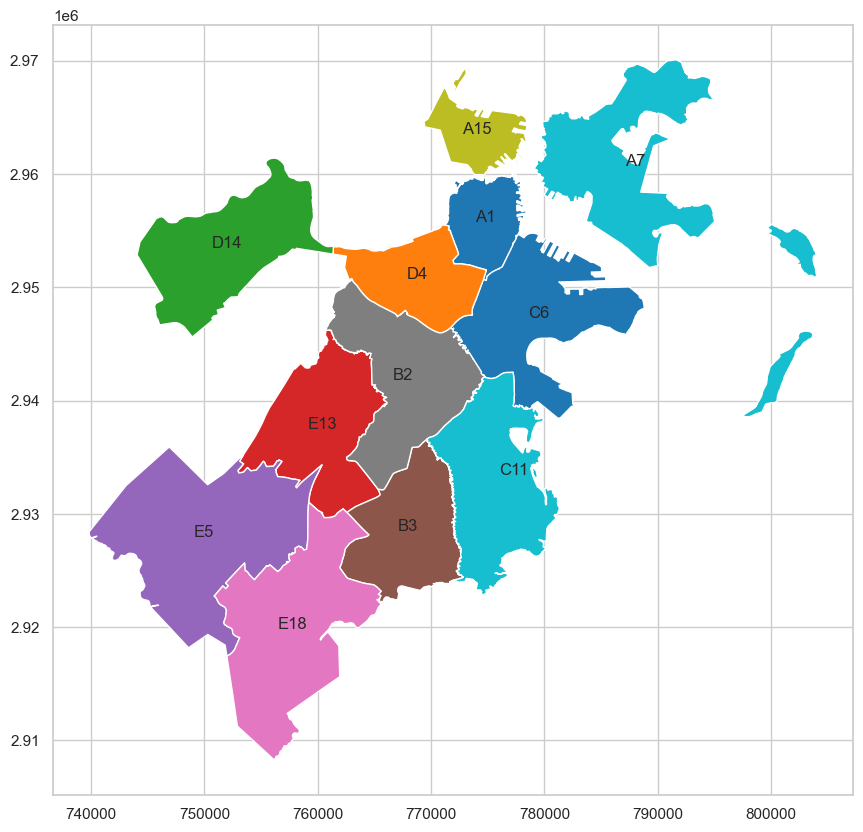

In [95]:
fig = plt.figure()
fig, ax = plt.subplots(figsize=(20, 10))
police_district_df.plot(ax=ax, column='geometry')
police_district_df.apply(lambda x: ax.annotate(text=x['DISTRICT'], xy=x.geometry.centroid.coords[0], ha='center'), axis=1)

In [96]:
# Read the shapefile
city_council_district_df = gpd.read_file("City_Council_Districts_-_Effective_for_the_2023_Municipal_Election.shp")

# Print the first few rows of the GeoDataFrame
print(city_council_district_df)

   FID    LONGNAME SHORTNAME  DISTRICT       COLOR  TOTAL  TARGET_DEV  \
0    1  District 1        D1         1  -851848832  76830        1758   
1    2  District 2        D2         2   465990528  77466        2394   
2    3  District 3        D3         3   494969216  73285       -1787   
3    4  District 4        D4         4      -65408  72917       -2155   
4    5  District 5        D5         5   412292224  75436         364   
5    6  District 6        D6         6  1971620992  76523        1451   
6    7  District 7        D7         7  1946148736  72147       -2925   
7    8  District 8        D8         8   639511936  76370        1298   
8    9  District 9        D9         9  -119742707  74673        -399   

   TARGET_D_1  TOTAL18  TOTALHISP  ...  BLACK  AIAN  ASIAN  HPI  OTHER  MLTMN  \
0        2.34    64257      24552  ...   3637   783   5080   50  20935   1689   
1        3.19    70183       6640  ...   4520   269  13604   55   4893   1005   
2       -2.38    60834    

In [97]:
print("city_council_district_df shape: ", city_council_district_df.shape)
print("city_council_district_df coordinate reference system: ",city_council_district_df.crs)

city_council_district_df shape:  (9, 38)
city_council_district_df coordinate reference system:  EPSG:4326


In [98]:
# reproject the coordinate system to police district coordinate system
city_council_district_df = city_council_district_df.to_crs("EPSG:2249")

0    Annotation(784827, 2.95999e+06, 'D1')
1    Annotation(783206, 2.94961e+06, 'D2')
2    Annotation(811439, 2.95211e+06, 'D3')
3    Annotation(771203, 2.92994e+06, 'D4')
4     Annotation(758424, 2.9219e+06, 'D5')
5    Annotation(753316, 2.93202e+06, 'D6')
6    Annotation(767892, 2.94193e+06, 'D7')
7    Annotation(767164, 2.95244e+06, 'D8')
8     Annotation(751872, 2.9536e+06, 'D9')
dtype: object

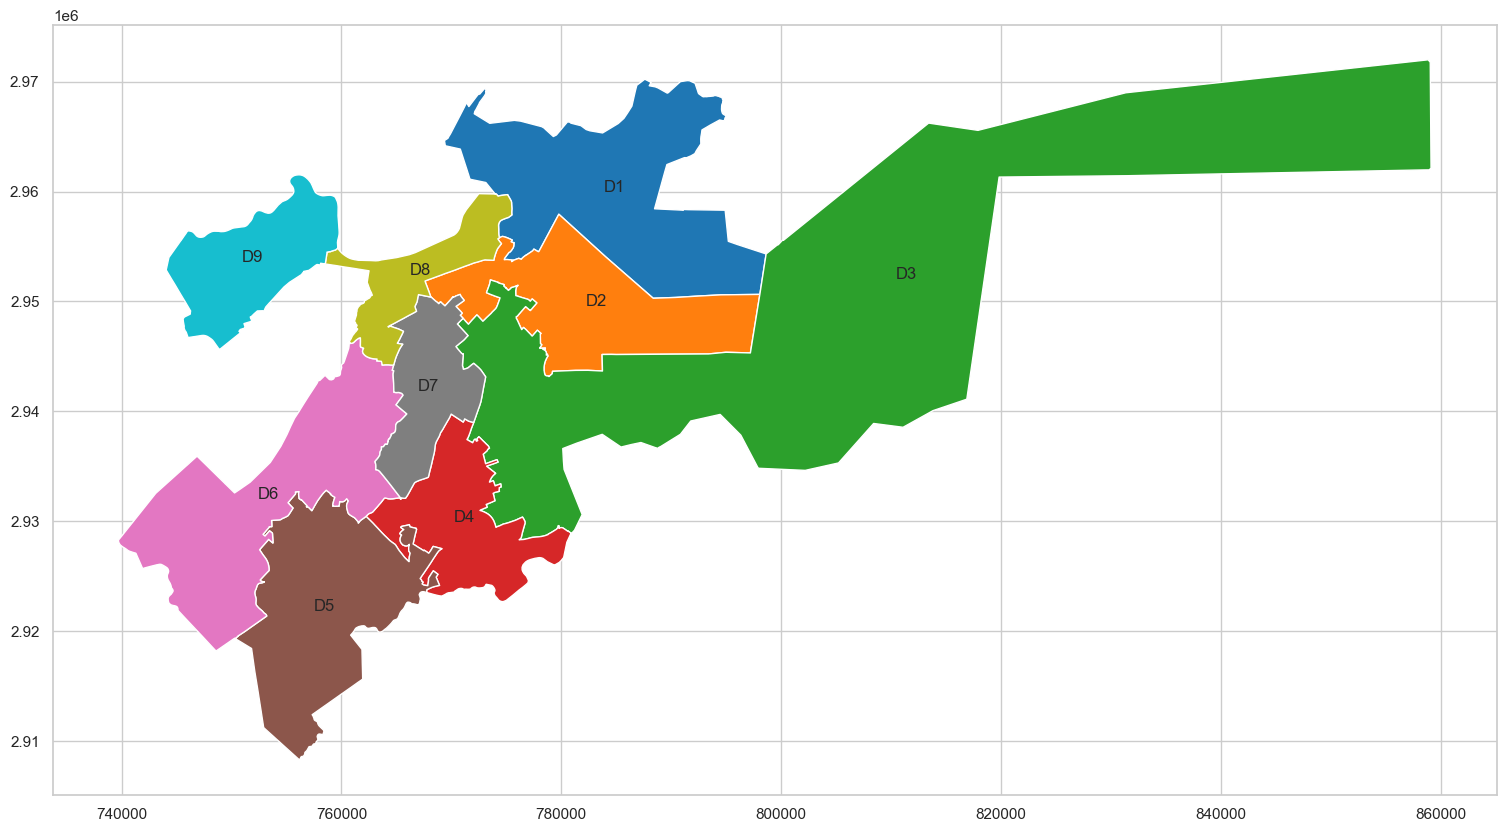

In [99]:
fig, ax = plt.subplots(figsize=(20, 10))
city_council_district_df.plot(ax=ax, column='geometry')
city_council_district_df.apply(lambda x: ax.annotate(text=x['SHORTNAME'], xy=x.geometry.centroid.coords[0], ha='center'), axis=1)

NameError: name 'Line2D' is not defined

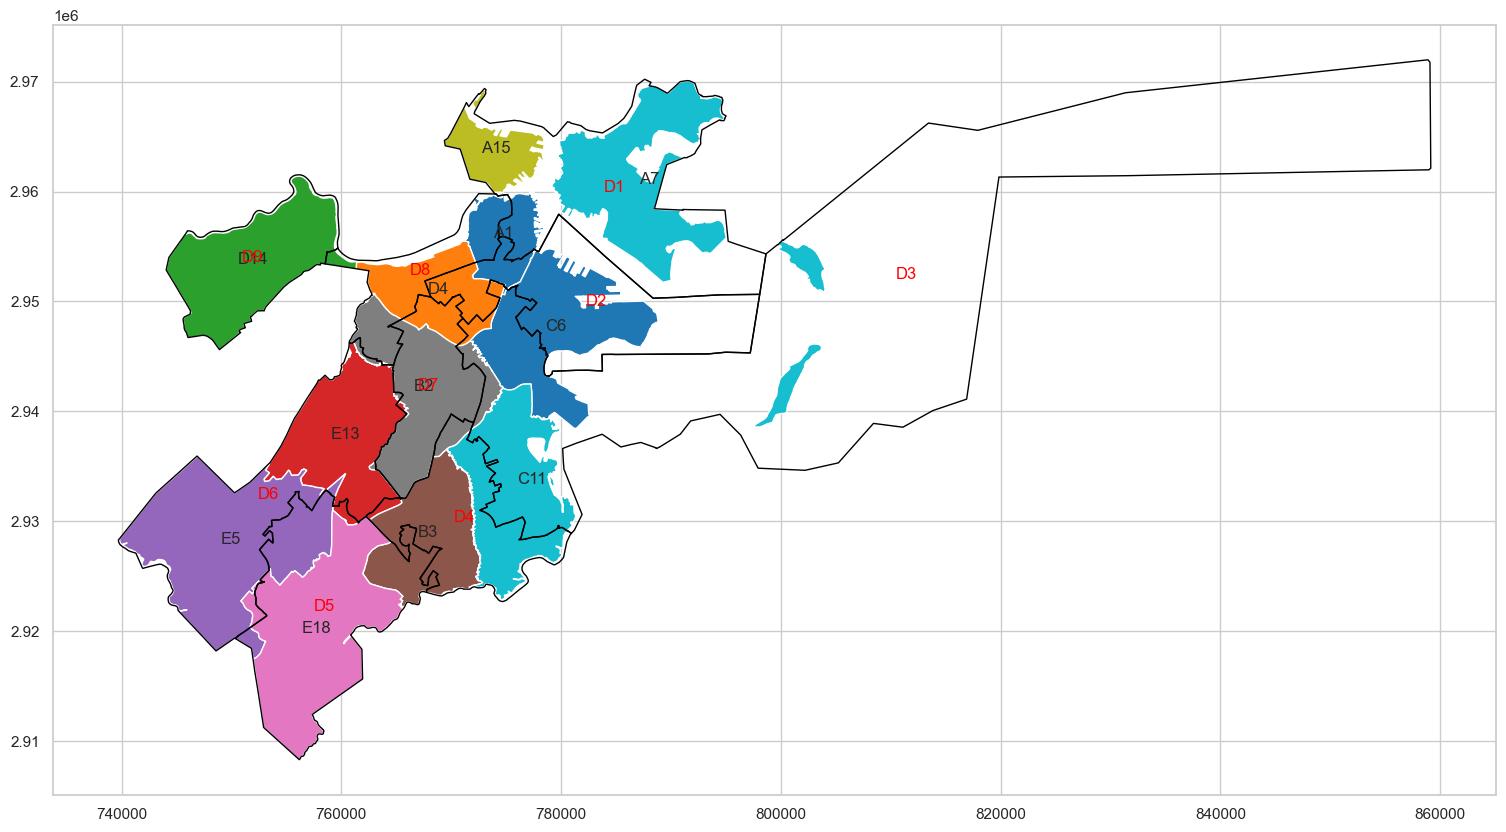

In [100]:

'''Plotting both police district and city councli on one figure'''

# fig, ax = plt.subplots(figsize=(20, 10))

# Plot gdf
# police_district_df.plot(ax=ax, column='geometry')
# police_district_df.apply(lambda x: ax.annotate(text=x['DISTRICT'], xy=x.geometry.centroid.coords[0], ha='center'), axis=1)

# # Plot gdf1 on the same axis
# city_council_district_df.plot(ax=ax, column='geometry')
# city_council_district_df.apply(lambda x: ax.annotate(text=x['SHORTNAME'], xy=x.geometry.centroid.coords[0], ha='center'), axis=1)
# plt.show()

'''
#  Plotting both police district and city councli on one figure
#  Police districts are displayed using colored area
#  City council are displayed using boundry lines
'''
fig, ax = plt.subplots(figsize=(20, 10))

# Plot police districts
police_district_plot = police_district_df.plot(ax=ax, column='geometry', label="Police Districts")
police_district_df.apply(lambda x: ax.annotate(text=x['DISTRICT'], xy=x.geometry.centroid.coords[0], ha='center'), axis=1)



# Add legend

legend_elements = [Line2D([0], [0], marker='o', color='blue', label='Police districts are Colored area with black label '),
                  Line2D([0], [0], marker='o', color='red', label='City council districts are Bordered lines with red label ')]
legend = ax.legend(handles=legend_elements, loc='upper left')

# Add the legend to the plot
ax.add_artist(legend)

plt.show()



## Questions

1. According to above figure there are 12 police districs and 9 city council districts. And D4 for police district and D4 of city council district are different zones. Is this correct?


# Shots fired and Shootings data

In [119]:
import folium
import pandas as pd

In [120]:
shootings_df = pd.read_csv("Shootings.csv")

In [121]:
shots_fired_df = pd.read_csv("Shots_fired.csv")

In [122]:
shootings_df.head()

,incident_num,shooting_date,district,shooting_type_v2,victim_gender,victim_race,victim_ethnicity_NIBRS,multi_victim
0,I152000196-00,2015-01-01 13:30:00+00,C11,Non-Fatal,Male,Black or African American,Not Hispanic or Latinx,f
1,I152000879-00,2015-01-04 01:58:00+00,E18,Non-Fatal,Male,Black or African American,Not Hispanic or Latinx,f
2,I152001014-00,2015-01-04 18:52:00+00,E5,Non-Fatal,Male,Black or African American,Not Hispanic or Latinx,f
3,I152002232-00,2015-01-08 22:45:00+00,B2,Non-Fatal,Male,Black or African American,Not Hispanic or Latinx,t
4,I152002233-00,2015-01-08 22:45:00+00,B2,Non-Fatal,Female,Black or African American,Not Hispanic or Latinx,t


In [123]:
shots_fired_df.head()

,incident_num,incident_date,district,ballistics_evidence
0,I152000093-00,2015-01-01 04:17:00+00,C11,f
1,I152000042-00,2015-01-01 00:05:00+00,A15,f
2,I152000514-00,2015-01-02 15:51:00+00,B3,t
3,I152000965-00,2015-01-04 15:30:00+00,B2,t
4,I152000872-00,2015-01-04 00:13:00+00,B2,f


In [124]:
Nonfatal_shootings_df = shootings_df[shootings_df['shooting_type_v2'] == 'Non-Fatal']
fatal_shootings_df = shootings_df[shootings_df['shooting_type_v2'] == 'Fatal']

In [125]:
Nonfatal_shootings_df.head()

,incident_num,shooting_date,district,shooting_type_v2,victim_gender,victim_race,victim_ethnicity_NIBRS,multi_victim
0,I152000196-00,2015-01-01 13:30:00+00,C11,Non-Fatal,Male,Black or African American,Not Hispanic or Latinx,f
1,I152000879-00,2015-01-04 01:58:00+00,E18,Non-Fatal,Male,Black or African American,Not Hispanic or Latinx,f
2,I152001014-00,2015-01-04 18:52:00+00,E5,Non-Fatal,Male,Black or African American,Not Hispanic or Latinx,f
3,I152002232-00,2015-01-08 22:45:00+00,B2,Non-Fatal,Male,Black or African American,Not Hispanic or Latinx,t
4,I152002233-00,2015-01-08 22:45:00+00,B2,Non-Fatal,Female,Black or African American,Not Hispanic or Latinx,t


In [126]:
fatal_shootings_df.head()

,incident_num,shooting_date,district,shooting_type_v2,victim_gender,victim_race,victim_ethnicity_NIBRS,multi_victim
6,I152002215-00,2015-01-08 22:45:00+00,B2,Fatal,Male,Black or African American,Not Hispanic or Latinx,t
10,I152005465-00,2015-01-20 11:03:00+00,B2,Fatal,Male,White,Not Hispanic or Latinx,f
24,I152011169-00,2015-02-11 10:30:00+00,E13,Fatal,Male,Black or African American,Not Hispanic or Latinx,f
33,I152020804-00,2015-03-15 03:58:11+00,E18,Fatal,Male,Black or African American,Not Hispanic or Latinx,t
35,I152020647-00,2015-03-14 15:46:13+00,B2,Fatal,Male,White,Hispanic or Latinx,f


In [127]:
Nonfatalcounts = Nonfatal_shootings_df.groupby(['victim_race', 'victim_gender']).size()
print(Nonfatalcounts)

fatalcounts = fatal_shootings_df.groupby(['victim_race', 'victim_gender']).size()
print(fatalcounts)



victim_race                victim_gender
Asian                      Male                6
Black or African American  Female            135
                           Male             1030
Unknown                    Female             10
                           Male               50
White                      Female             20
                           Male              220
dtype: int64
victim_race                victim_gender
Asian                      Male               1
Black or African American  Female            21
                           Male             224
Unknown                    Female             1
                           Male               7
White                      Female             1
                           Male              43
dtype: int64


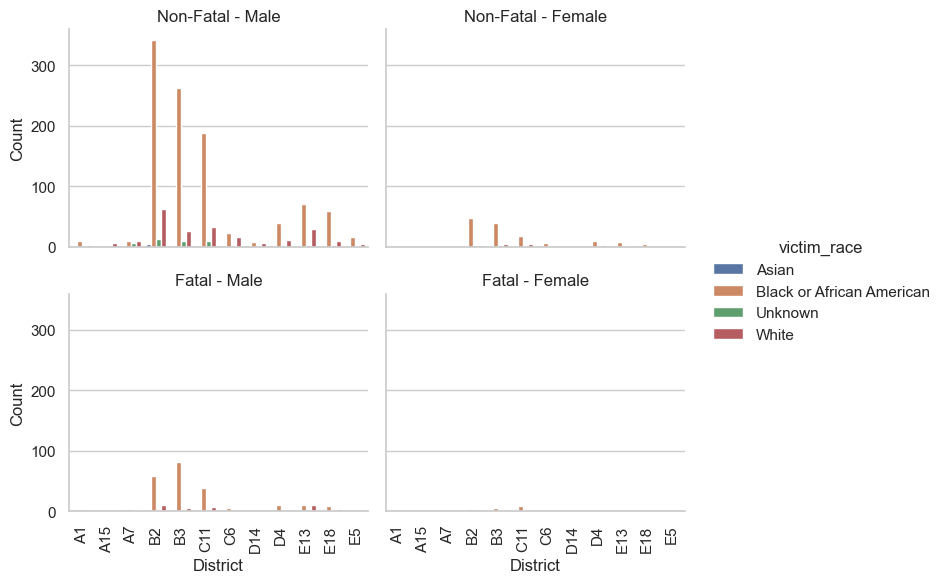

In [128]:
import seaborn as sns
import matplotlib.pyplot as plt

# group the data by district, victim race, victim gender, and shooting type, and count the number of occurrences
grouped = shootings_df.groupby(['district', 'victim_race', 'victim_gender', 'shooting_type_v2']).size().reset_index(name='count')

# define custom column titles
custom_col_titles = ['Male', 'Female']

# create the subplots with custom column titles
g = sns.catplot(x='district', y='count', hue='victim_race', col='victim_gender', row='shooting_type_v2', data=grouped, kind='bar', height=3, aspect=1.2, col_order=custom_col_titles)

# set the titles
g.set_titles("{row_name} - {col_name}")

# set the axis labels
g.set_axis_labels("District", "Count")

# rotate the x-axis labels
for ax in g.axes.flatten():
    ax.tick_params(axis='x', labelrotation=90)

# adjust the plot layout
g.tight_layout()

# save the plot as a PNG file
g.savefig("shooting_plot.png")


In [129]:

Shots_shootings_df = pd.merge(shootings_df, shots_fired_df, on="incident_num")
Shots_shootings_df.head()

,incident_num,shooting_date,district_x,shooting_type_v2,victim_gender,victim_race,victim_ethnicity_NIBRS,multi_victim,incident_date,district_y,ballistics_evidence
0,I152071601,2015-08-29 02:32:00+00,C11,Non-Fatal,Male,Black or African American,Not Hispanic or Latinx,f,2015-08-29 02:00:00+00,A1,f
1,I152080107,2015-09-26 01:10:00+00,C11,Non-Fatal,Male,Black or African American,Not Hispanic or Latinx,f,2015-09-26 01:10:00+00,C11,t
2,I152103493,2015-12-15 16:32:00+00,C11,Non-Fatal,Male,Black or African American,Not Hispanic or Latinx,f,2015-12-15 16:32:00+00,C11,t
3,I162043232,2016-06-02 03:51:00+00,C11,Non-Fatal,Male,Black or African American,Not Hispanic or Latinx,f,2016-06-02 03:42:00+00,C11,f
4,I162043217,2016-06-02 00:41:00+00,A7,Non-Fatal,Male,White,Hispanic or Latinx,f,2016-06-02 00:41:00+00,A7,t


In [130]:
diff_districts = (Shots_shootings_df['district_x'] != Shots_shootings_df['district_y'])
num_diff_districts = diff_districts.sum()
print(f"Number of columns where district_x and district_y are different: {num_diff_districts}")


Number of columns where district_x and district_y are different: 2


In [131]:
Shots_shootings_df = Shots_shootings_df[~diff_districts]

In [132]:
Shots_shootings_df.head()

,incident_num,shooting_date,district_x,shooting_type_v2,victim_gender,victim_race,victim_ethnicity_NIBRS,multi_victim,incident_date,district_y,ballistics_evidence
1,I152080107,2015-09-26 01:10:00+00,C11,Non-Fatal,Male,Black or African American,Not Hispanic or Latinx,f,2015-09-26 01:10:00+00,C11,t
2,I152103493,2015-12-15 16:32:00+00,C11,Non-Fatal,Male,Black or African American,Not Hispanic or Latinx,f,2015-12-15 16:32:00+00,C11,t
3,I162043232,2016-06-02 03:51:00+00,C11,Non-Fatal,Male,Black or African American,Not Hispanic or Latinx,f,2016-06-02 03:42:00+00,C11,f
4,I162043217,2016-06-02 00:41:00+00,A7,Non-Fatal,Male,White,Hispanic or Latinx,f,2016-06-02 00:41:00+00,A7,t
5,I162064098,2016-08-09 11:20:52+00,B2,Non-Fatal,Male,White,Not Hispanic or Latinx,f,2016-08-10 23:19:00+00,B2,t


In [133]:
Shots_shootings_df["district_x"].unique()

array(['C11', 'A7', 'B2', 'B3', 'E18', 'E13', 'E5', 'D4', 'C6'],
      dtype=object)

<AxesSubplot: xlabel='count', ylabel='DISTRICT'>

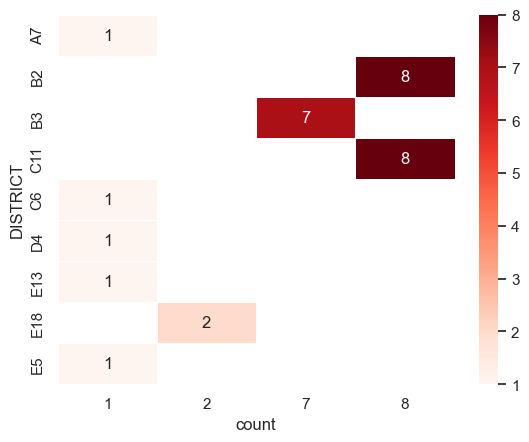

In [151]:
import seaborn as sns
import pandas as pd

# merge the two dataframes based on the police district column
merged_df1 = pd.merge(police_district_df, Shots_shootings_df, left_on='DISTRICT', right_on='district_x')

# count the number of incidents in each police district
district_counts = merged_df1.groupby('DISTRICT')['incident_num_y'].count().reset_index()
district_counts.columns = ['DISTRICT', 'count']

# create a heatmap using seaborn
sns.set(style='whitegrid')
sns.heatmap(police_district_df.merge(district_counts, on='DISTRICT')[['DISTRICT', 'count']].pivot(index='DISTRICT', columns='count', values='count'), cmap='Reds', annot=True, fmt='g', linewidths=.5)


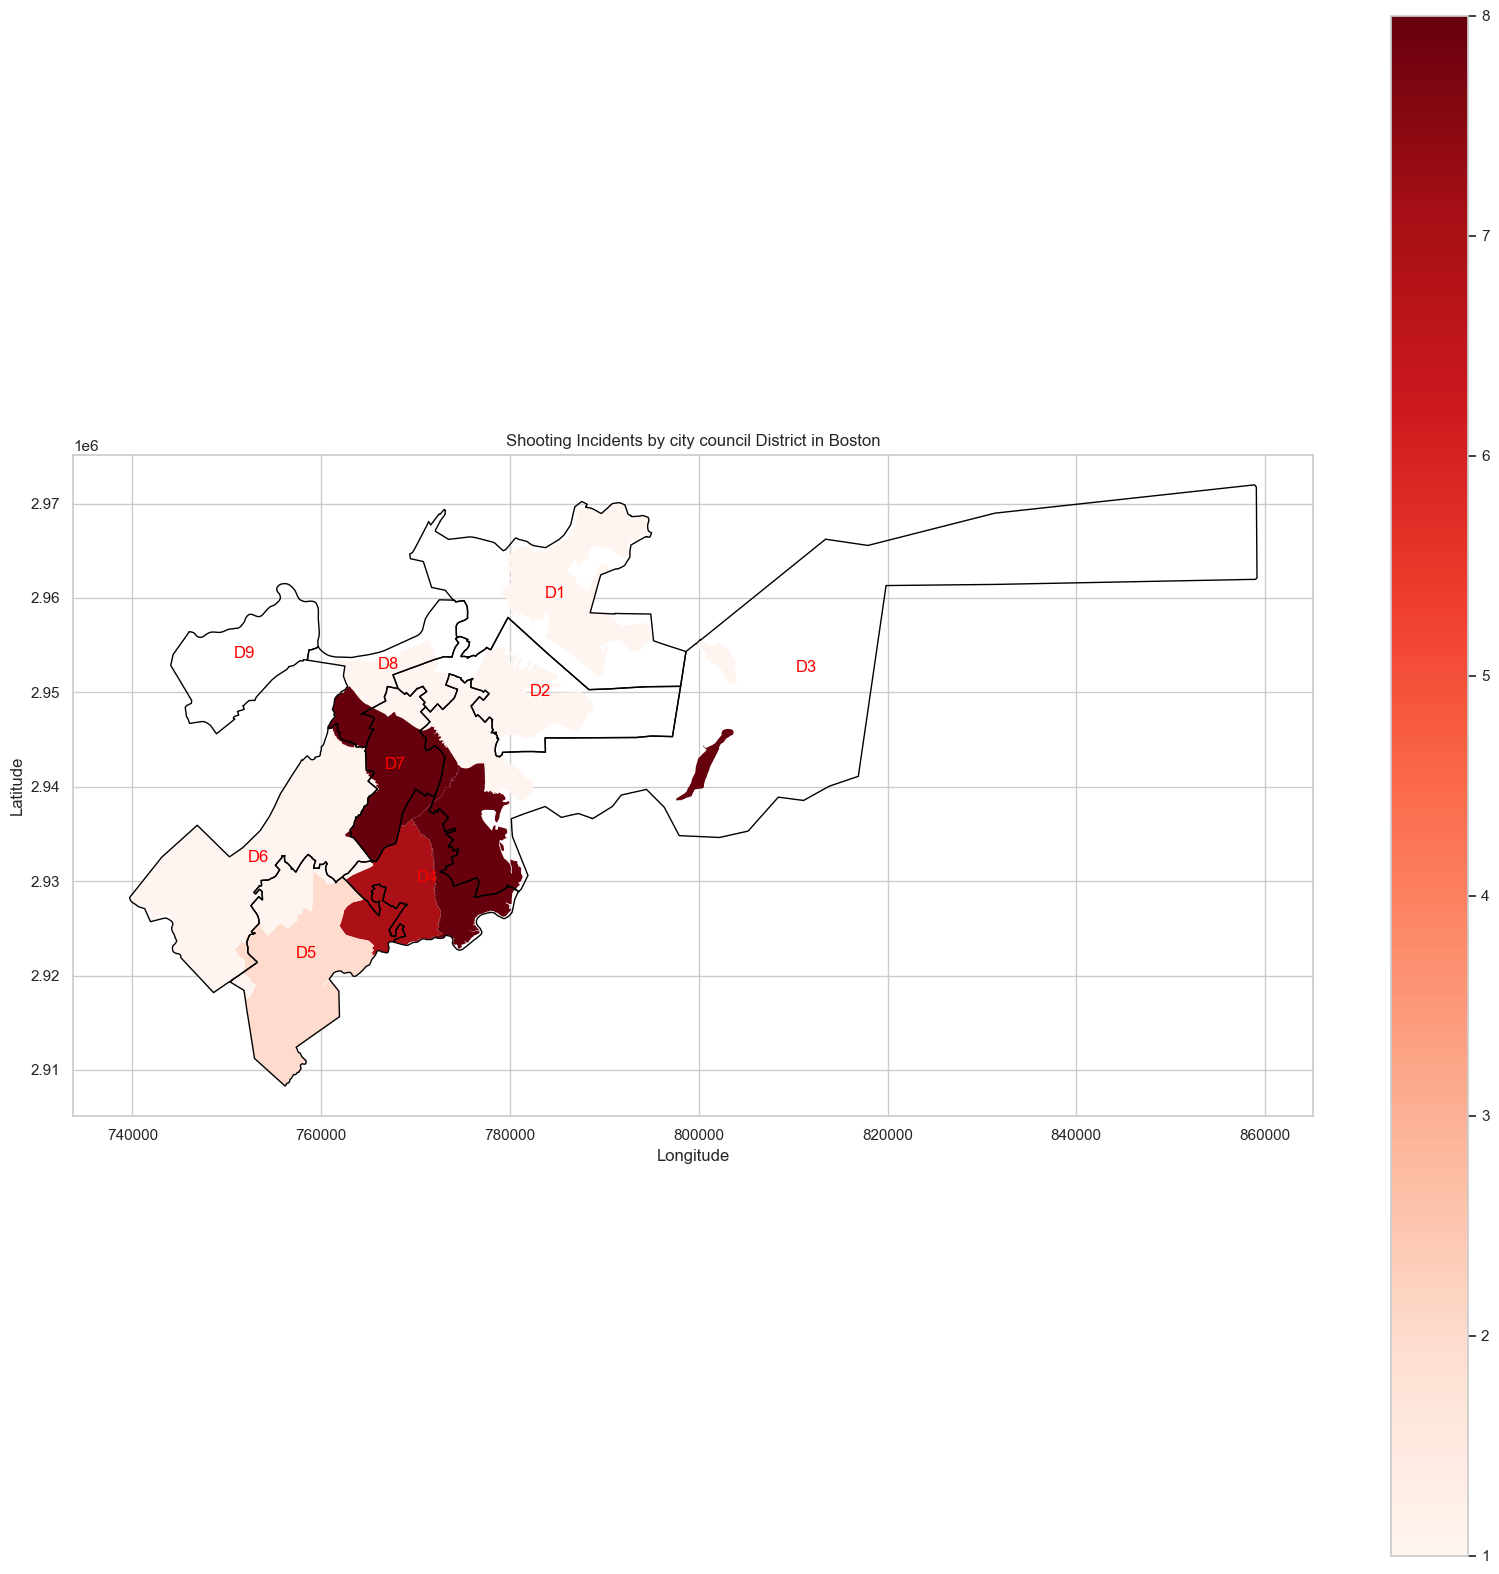

In [163]:
merged_df2 = police_district_df.merge(Shots_shootings_df.groupby('district_x').count()[['incident_num']], 
                                     left_on='DISTRICT', right_index=True, how='left')


fig, ax = plt.subplots(figsize=(20, 20))

merged_df2.plot(column='incident_num_y', cmap='Reds', linewidth=0, edgecolor='black', ax=ax, legend=True)

# Add district labels
merged_df2['coords'] = merged_df2['geometry'].apply(lambda x: x.representative_point().coords[:])
merged_df2['coords'] = [coords[0] for coords in merged_df2['coords']]
# for idx, row in merged_df2.iterrows():
#     plt.annotate(text=row['DISTRICT'], xy=row['coords'], horizontalalignment='center')
    

# Plot city council districts
city_council_district_plot = city_council_district_df.plot(ax=ax, facecolor='none', edgecolor='black', label="City Council Districts")
city_council_district_df.apply(lambda x: ax.annotate(text=x['SHORTNAME'], xy=x.geometry.centroid.coords[0], ha='center', color='red'), axis=1)


ax.set_title('Shooting Incidents by city council District in Boston')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

plt.savefig('shooting_incidents_by_district.png', dpi=300)
plt.show()



